**GODFATHER NETWORK**

In [39]:
import re
from collections import defaultdict
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt
import pprint as pp

In [28]:
f = open('godfather_script.txt')
with open('godfather_script.txt') as fh:
    script = fh.read()
    
scenes = re.split('INT |EXT ', script) #Scene headings
scenes = scenes[1:]

In [29]:
script[300:600]

'W, AMERIGO BONASERA, a\n\tman of sixty, dressed in a black suit, on the verge of great\n\temotion.\n\n\t\t\t\tBONASERA\n\t\tAmerica has made my fortune.\n\n\tAs he speaks, THE VIEW imperceptibly begins to loosen.\n\n\t\t\t\tBONASERA\n\t\tI raised my daughter in the American\n\t\tfashion; I gave her freedom, but\n\t\ttaught her ne'

In [30]:
scenes[4]

"DAY: MALL (SUMMER 1945)\n\n\tWHAT HE SEES:\n\n\tNIPPI waits nervously by the barrel.\n\n\t\t\t\tHAGEN (O.S.)\n\t\tHis father worked with you in the\n\t\tfreight yards when you were young.\n\n\tLUCA BRASI sitting alone, grotesque and quiet.\n\n\t\t\t\tHAGEN (O.S.)\n\t\tHe's not on the list, but Luca\n\t\tBrasi wants to see you.\n\n\t"

In [31]:
scene_chars = defaultdict(list)
i = 1

for scene in scenes:
    scene_characters = []
    lines = re.split('\t\t', scene)
    for line in lines:
        if line:
            characters = re.findall('^[A-Z]+\s*[A-Z]*\n+', line)
            for character in characters:
                if character:
                    scene_characters.append(character.strip())
    scene_characters = set(scene_characters)
    key = 'scene' + str(i)
    if len(scene_characters) > 0:
        scene_chars[key] = list(scene_characters)
        i += 1

In [32]:
scene_chars

defaultdict(list,
            {'scene1': ['BONASERA', 'DON CORLEONE'],
             'scene2': ['DON CORLEONE', 'SANDRA', 'SONNY'],
             'scene3': ['CLEMENZA', 'PAULIE', 'SONNY'],
             'scene4': ['HAGEN', 'DON CORLEONE', 'NAZORINE'],
             'scene5': ['HAGEN', 'DON CORLEONE'],
             'scene6': ['MICHAEL', 'KAY'],
             'scene7': ['WOMAN', 'CARLO', 'PAULIE'],
             'scene8': ['HAGEN', 'MICHAEL', 'KAY'],
             'scene9': ['HAGEN', 'DON CORLEONE', 'LUCA'],
             'scene10': ['DON CORLEONE', 'MICHAEL', 'JOHNNY', 'KAY'],
             'scene11': ['HAGEN'],
             'scene12': ['LUCY'],
             'scene13': ['HAGEN'],
             'scene14': ['HAGEN', 'DON CORLEONE', 'JOHNNY', 'SONNY'],
             'scene15': ['DON CORLEONE', 'MICHAEL'],
             'scene16': ['DON CORLEONE', 'MICHAEL'],
             'scene17': ['DON CORLEONE', 'GENCO'],
             'scene18': ['DON CORLEONE'],
             'scene19': ['SONNY'],
             'sce

In [33]:
all_characters = {}
for scene in scene_chars:
    for char in scene_chars[scene]:
        all_characters[char] = defaultdict(int)
        
for scene in scene_chars:
    for char in scene_chars[scene]:
        temp_list = scene_chars[scene][:]
        temp_list.remove(char)
        for partner in temp_list:
            all_characters[char][partner] += 1

In [42]:
all_characters

{'BONASERA': defaultdict(int, {'DON CORLEONE': 2}),
 'DON CORLEONE': defaultdict(int,
             {'BONASERA': 2,
              'SANDRA': 1,
              'SONNY': 3,
              'HAGEN': 9,
              'NAZORINE': 1,
              'LUCA': 1,
              'MICHAEL': 6,
              'JOHNNY': 2,
              'KAY': 1,
              'GENCO': 1,
              'SOLLOZZO': 1,
              'FREDO': 1,
              'OFFICE MANAGER': 1,
              'DON ZALUCHI': 1,
              'BARZINI': 1,
              'TATTAGLIA': 1,
              'TESSIO': 1,
              'CARLO': 1,
              'CLEMENZA': 1}),
 'SANDRA': defaultdict(int, {'DON CORLEONE': 1, 'SONNY': 2, 'CLEMENZA': 1}),
 'SONNY': defaultdict(int,
             {'DON CORLEONE': 3,
              'SANDRA': 2,
              'CLEMENZA': 6,
              'PAULIE': 2,
              'HAGEN': 8,
              'JOHNNY': 1,
              'SOLLOZZO': 2,
              'MAMA': 1,
              'MICHAEL': 5,
              'BRUNO': 1,
  

In [13]:
G = nx.Graph()
for character in all_characters:
    for partner in all_characters[character]:
        G.add_edge(character, partner, weight = all_characters[character][partner])

In [44]:
print(list(G.nodes()))

['BONASERA', 'DON CORLEONE', 'SANDRA', 'SONNY', 'HAGEN', 'NAZORINE', 'LUCA', 'MICHAEL', 'JOHNNY', 'KAY', 'GENCO', 'SOLLOZZO', 'FREDO', 'OFFICE MANAGER', 'DON ZALUCHI', 'BARZINI', 'TATTAGLIA', 'TESSIO', 'CARLO', 'CLEMENZA', 'PAULIE', 'MAMA', 'BRUNO', 'DRIVER', 'CONNIE', 'LAMPONE', 'WOMAN', 'WOLTZ', 'BUTTON MAN', 'NURSE', 'ENZO', 'MCCLUSKEY', 'A DETECTIVE', 'COP', 'DON TOMMASSINO', 'FABRIZZIO', 'CALO', 'VITELLI', 'APPOLONIA', 'MOE', 'GIRL', 'PRIEST', 'NERI', 'MAN']


In [15]:
len(G.nodes())

44

In [45]:
print(list(G.edges()))

[('BONASERA', 'DON CORLEONE'), ('DON CORLEONE', 'SANDRA'), ('DON CORLEONE', 'SONNY'), ('DON CORLEONE', 'HAGEN'), ('DON CORLEONE', 'NAZORINE'), ('DON CORLEONE', 'LUCA'), ('DON CORLEONE', 'MICHAEL'), ('DON CORLEONE', 'JOHNNY'), ('DON CORLEONE', 'KAY'), ('DON CORLEONE', 'GENCO'), ('DON CORLEONE', 'SOLLOZZO'), ('DON CORLEONE', 'FREDO'), ('DON CORLEONE', 'OFFICE MANAGER'), ('DON CORLEONE', 'DON ZALUCHI'), ('DON CORLEONE', 'BARZINI'), ('DON CORLEONE', 'TATTAGLIA'), ('DON CORLEONE', 'TESSIO'), ('DON CORLEONE', 'CARLO'), ('DON CORLEONE', 'CLEMENZA'), ('SANDRA', 'SONNY'), ('SANDRA', 'CLEMENZA'), ('SONNY', 'CLEMENZA'), ('SONNY', 'PAULIE'), ('SONNY', 'HAGEN'), ('SONNY', 'JOHNNY'), ('SONNY', 'SOLLOZZO'), ('SONNY', 'MAMA'), ('SONNY', 'MICHAEL'), ('SONNY', 'BRUNO'), ('SONNY', 'TESSIO'), ('SONNY', 'DRIVER'), ('SONNY', 'CONNIE'), ('SONNY', 'FREDO'), ('HAGEN', 'CLEMENZA'), ('HAGEN', 'PAULIE'), ('HAGEN', 'NAZORINE'), ('HAGEN', 'MICHAEL'), ('HAGEN', 'KAY'), ('HAGEN', 'LUCA'), ('HAGEN', 'JOHNNY'), ('HAGEN

In [17]:
len(G.edges())

109

In [18]:
d = nx.degree(G)
dic = dict(d)

In [19]:
weights = [(G[u][v]['weight'])/3 if (G[u][v]['weight']) != 1 else 1 for u,v in G.edges()]

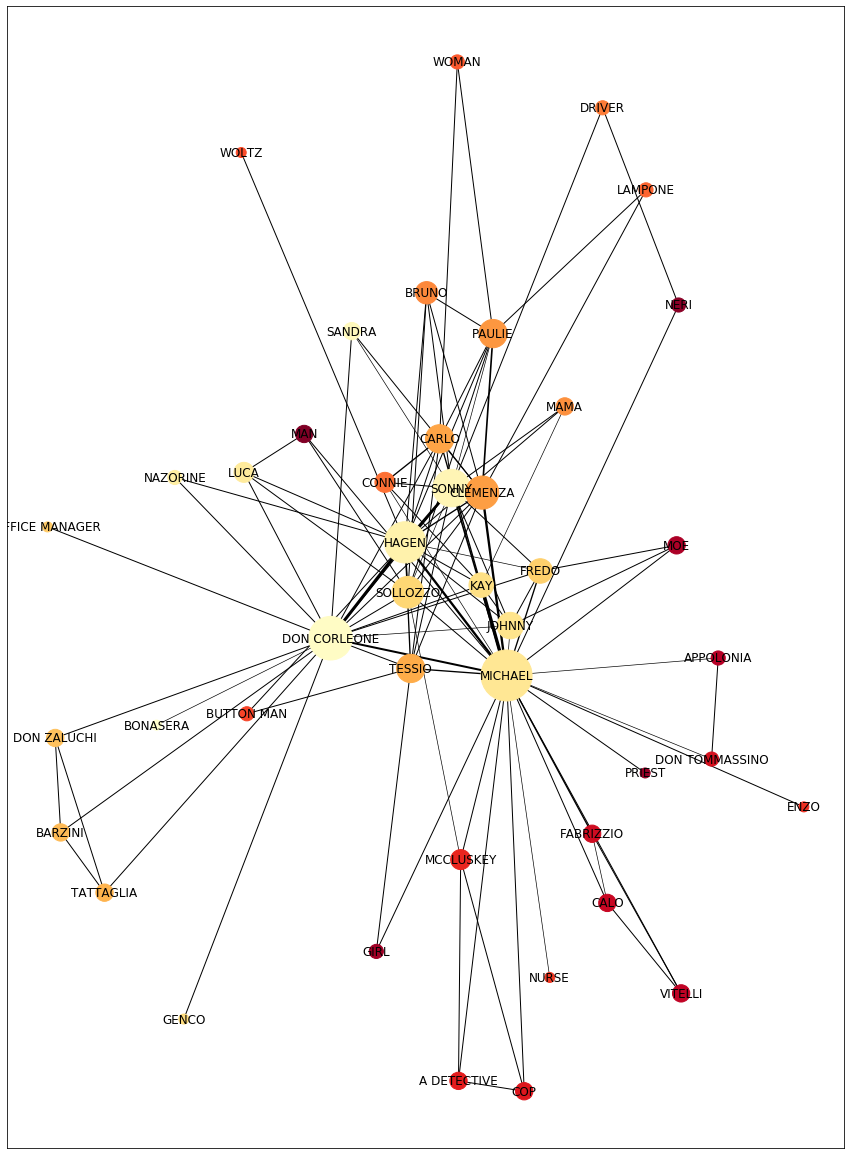

In [51]:
plt.figure(figsize=(15, 21))
nx.draw_networkx(G, with_labels = True, node_color = range(44), width = weights , cmap = plt.cm.get_cmap('YlOrRd'), node_size=[v * 100 for v in dic.values()], alpha = 1)
plt.show()

In [58]:
betweenness = nx.betweenness_centrality(G)

In [59]:
sorted([(elem[0], elem[1]) for elem in list(betweenness.items())], key = lambda x: x[1], reverse = True )[:10]

[('MICHAEL', 0.5222140324299791),
 ('DON CORLEONE', 0.3031817942116945),
 ('HAGEN', 0.14412556189964829),
 ('SONNY', 0.0889399852024437),
 ('CLEMENZA', 0.05787059009650369),
 ('CARLO', 0.04317187058050847),
 ('SOLLOZZO', 0.04100273419210297),
 ('TESSIO', 0.027836224929248185),
 ('PAULIE', 0.020691609977324263),
 ('KAY', 0.012245856764129181)]

In [60]:
closeness = nx.closeness_centrality(G)

In [61]:
sorted([(elem[0], elem[1]) for elem in list(closeness.items())], key = lambda x: x[1], reverse = True )[:10]

[('MICHAEL', 0.7166666666666667),
 ('DON CORLEONE', 0.6417910447761194),
 ('HAGEN', 0.6231884057971014),
 ('SONNY', 0.5972222222222222),
 ('CLEMENZA', 0.5733333333333334),
 ('SOLLOZZO', 0.5657894736842105),
 ('TESSIO', 0.5512820512820513),
 ('CARLO', 0.5443037974683544),
 ('JOHNNY', 0.5308641975308642),
 ('FREDO', 0.524390243902439)]

In [62]:
eigenvector = nx.eigenvector_centrality(G)

In [63]:
sorted([(elem[0], elem[1]) for elem in list(eigenvector.items())], key = lambda x: x[1], reverse = True )[:10]

[('MICHAEL', 0.3810687850116223),
 ('HAGEN', 0.3560803750320932),
 ('DON CORLEONE', 0.33937405989102976),
 ('SONNY', 0.3162930533012664),
 ('CLEMENZA', 0.2797603471206165),
 ('SOLLOZZO', 0.24942755505324998),
 ('TESSIO', 0.22001952034650377),
 ('CARLO', 0.20974686668006684),
 ('JOHNNY', 0.19933877438176464),
 ('FREDO', 0.1833264688266245)]